In [9]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt = tf.float32

In [3]:
def make_variables(x, y, initializer):
    return tf.Variable(initializer(shape=[x, y], dtype=dt))

In [4]:
def hardlim(x):
    return tf.constant(0, dtype=dt) if tf.less(x, 0) else tf.constant(1, dtype=dt)

In [5]:
init = tf.random_uniform_initializer(minval=-1., maxval=1.)

In [6]:
Patterns = tf.Variable(tf.zeros((8, 90000, 1), dtype=dt))

In [7]:
for i in range(1, 9):
    PATH = "LEGO_PERCEPTRON/"
    file = "P" + str(i) + ".jpg"
    image = cv.imread(PATH+file) 
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    gray_reshape = cv.resize(gray, (1, 90000))
    Patterns[i-1, :].assign(gray_reshape)

In [33]:
num_patterns = 8
num_inputs = 90000
num_neurons = 1
T = tf.constant([0, 1, 0, 1, 0, 1, 0, 1], dtype=dt)
W = make_variables(num_neurons, num_inputs, init)
b = make_variables(num_neurons, 1, init)
dw = tf.Variable(tf.zeros([num_neurons, num_inputs], dtype=dt))
e = tf.Variable(num_neurons, dtype=dt)
sum_e = tf.Variable(0, dtype=dt)

In [175]:
error = []
for epocas in range(1, 700):
    dw = tf.Variable(tf.zeros([num_neurons, num_inputs], dtype=dt))
    sum_e = tf.Variable(0, dtype=dt)
    for i in range(0, 8):
        #a = tf.map_fn(hardlim, tf.subtract(tf.matmul(W, Patterns[i, :]), b))
        a =  tf.subtract(tf.matmul(W, Patterns[i, :]), b)
        e = tf.multiply(tf.subtract(T[i], a), 0.0000000004)
        sum_e = tf.add(sum_e, e)
        dw = tf.add(dw, e*tf.transpose(Patterns[i, :]))
    W = tf.add(W, dw)
    b = tf.add(b, tf.multiply(sum_e, 100000))
    error.append(sum_e.numpy()[0, 0])

In [176]:
sum_e.numpy()[0][0]

-9.504701e-12

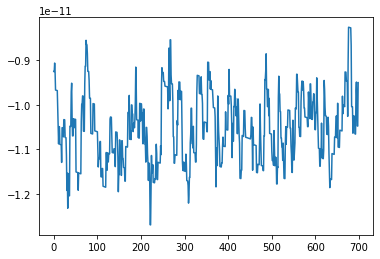

In [177]:
plt.plot(error)

In [178]:
estimated = []
for i in range(0, 8):
    a = tf.subtract(tf.matmul(W, Patterns[i, :]), b)
    estimated.append(a.numpy()[0][0])  
estimated, b

([0.12683153,
  0.94956636,
  0.01060915,
  1.0109067,
  -0.09866667,
  1.0352521,
  -0.033263683,
  1.0225339],
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.0029416]], dtype=float32)>)

In [179]:
img = tf.reshape(W, (300,300))
img1 = img.numpy()
img2 = img.numpy()

In [180]:
for i, row in enumerate(img1):
    for j, col in enumerate(row):
        if img1[i][j] <= 0:
            img1[i][j] = 0
for i, row in enumerate(img2):
    for j, col in enumerate(row):
        if img2[i][j] >= 0:
            img2[i][j] = 0
        else:
            img2[i][j] = -img2[i][j]

In [181]:
img1_res = (img1/img1.max())*255
img2_res = (img2/img2.max())*255

In [182]:
img1_np = np.array(img1_res, dtype="uint8")
img2_np = np.array(img2_res, dtype="uint8")

In [183]:
cv.imshow("window", img1_np)
cv.waitKey(2000)

cv.imshow("window", img2_np)
cv.waitKey(2000)

cv.destroyAllWindows()